In [ ]:
# prompt: decompress a file named /content/pr_realpower_09-2023_15min.csv.gz

!gunzip /content/pr_realpower_09-2023_15min.csv.gz

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
import pandas as pd

real_power = pd.read_csv("/content/pr_realpower_09-2023_15min.csv", parse_dates=True, index_col="local_15min")
real_power.head(3)

,dataid,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,bedroom2,...,venthood1,waterheater1,waterheater2,wellpump1,winecooler1,leg1v,leg2v,energy_storage_system,energy_storage_system_l1,energy_storage_system_l2
local_15min,,,,,,,,,,,,,,,,,,,,,
2023-09-01 00:00:00-05:00,10826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,120.296,120.101,NaN,NaN,NaN
2023-09-01 00:15:00-05:00,3835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,122.681,122.555,NaN,NaN,NaN
2023-09-01 00:15:00-05:00,1245,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,0.835,NaN,NaN,NaN,126.579,125.621,NaN,NaN,NaN


In [ ]:
real_power_10 = real_power * 1000
real_power_10.head(3)

,dataid,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,bedroom2,...,venthood1,waterheater1,waterheater2,wellpump1,winecooler1,leg1v,leg2v,energy_storage_system,energy_storage_system_l1,energy_storage_system_l2
local_15min,,,,,,,,,,,,,,,,,,,,,
2023-09-01 00:00:00-05:00,10826000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,120296.0,120101.0,NaN,NaN,NaN
2023-09-01 00:15:00-05:00,3835000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,122681.0,122555.0,NaN,NaN,NaN
2023-09-01 00:15:00-05:00,1245000,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,835.0,NaN,NaN,NaN,126579.0,125621.0,NaN,NaN,NaN


In [ ]:
data = {}
for col in real_power.columns:
  data[col] = [val for val in real_power_10[col].values if val == val]
data

In [ ]:
real_power.shape

(59137, 81)

In [ ]:
real_power['furnace2'].isnull().sum()

59137

In [ ]:
good_appliances = [app for app in data.keys() if data[app] != []]
good_appliances

['dataid',
 'air1',
 'air2',
 'airwindowunit1',
 'bedroom1',
 'diningroom1',
 'drye1',
 'grid',
 'kitchen1',
 'kitchen2',
 'kitchenapp1',
 'lights_plugs1',
 'lights_plugs2',
 'lights_plugs3',
 'lights_plugs4',
 'lights_plugs5',
 'lights_plugs6',
 'livingroom1',
 'oven1',
 'pump1',
 'range1',
 'refrigerator1',
 'solar',
 'waterheater1',
 'leg1v',
 'leg2v',
 'energy_storage_system']

**Resampling for 5Min**

In [ ]:
good_data = {}
for app in good_appliances:
  if app not in ['solar', "pump1", 'grid']:
    good_data[app] = data[app]
good_data.keys()

dict_keys(['dataid', 'air1', 'air2', 'airwindowunit1', 'bedroom1', 'diningroom1', 'drye1', 'kitchen1', 'kitchen2', 'kitchenapp1', 'lights_plugs1', 'lights_plugs2', 'lights_plugs3', 'lights_plugs4', 'lights_plugs5', 'lights_plugs6', 'livingroom1', 'oven1', 'range1', 'refrigerator1', 'waterheater1', 'leg1v', 'leg2v', 'energy_storage_system'])

In [ ]:
def sort_len(x, y):
  return len(y)
sorted_appliances = sorted(good_data.items(), key=lambda x: len(x[1]))

In [ ]:
data_cleaned = pd.DataFrame(sorted_appliances, columns=['appliance', 'powerSequence'])
data_cleaned.head(10)

,appliance,powerSequence
0,lights_plugs5,"[-1.0, 437.0, 450.0, 495.0, -1.0, -1.0, 17.0, ..."
1,lights_plugs6,"[0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 3.0, 0.0, ..."
2,oven1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,diningroom1,"[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, ..."
4,kitchen2,"[12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12...."
5,energy_storage_system,"[1175.0, 972.0, 830.0, 1188.0, 1158.0, 797.0, ..."
6,air2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,airwindowunit1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,bedroom1,"[18.0, 29.0, 29.0, 32.0, 29.0, 25.0, 18.0, 18...."
9,livingroom1,"[-2.0, -3.0, -2.0, -3.0, -3.0, -3.0, -3.0, -3...."


In [ ]:
"""import seaborn as sns
import matplotlib.pyplot as plt

data_cleaned['appliance'].iloc[:1].plot()
plt.title('Power Sequence')
plt.ylabel('Power')
plt.xlabel('Time')
plt.show()"""

"import seaborn as sns\nimport matplotlib.pyplot as plt\n\ndata_cleaned['appliance'].iloc[:1].plot()\nplt.title('Power Sequence')\nplt.ylabel('Power')\nplt.xlabel('Time')\nplt.show()"

## **Article Adaptative**

Partie 1:

### Adaptative

In [ ]:
%%time
import matplotlib.pyplot as plt
import numpy as np


def find_working_states(power_readings, theta):
    d = {}

    # Count occurrences of each value
    for j in range(len(power_readings)):
        x_j = int(power_readings[j])
        if x_j in d:
            d[x_j] += 1
        else:
            d[x_j] = 1

    # Sort keys of d
    pa = sorted(d.keys())
    n = len(pa)
    U = []

    # Find local maxima and add to U
    for j in range(1, n - 1):
        if d[pa[j]] > d[pa[j - 1]] and d[pa[j]] > d[pa[j + 1]]:
            U.append(pa[j])

    print("Densités:", d)
    print('Etats Possibles:', U)
    print('STD:', np.std(U))

    #plt.title('Densités')
    #plt.scatter(d.keys(), d.values()) # Fix this bug ! np.log + 1 TRANSFORM
    #plt.show()
    # Check condition and delete if necessary
    j = 0
    while j < len(U) - 1:
        if U[j + 1] - U[j] < theta:
            del U[j]
        else:
            j += 1

    return U

app_index = 0
print('APP:', str(data_cleaned['appliance'][app_index]).upper(), '\n', '=='*25)
Q = data_cleaned['powerSequence'][app_index]
theta = 0.2 * max(Q) # The threshold is 20% of the maximum value (Page 3)
print('Max value Q:', max(Q))
print("20% Max Q:", theta, '\n', '=='*25)
result = find_working_states(Q, theta)
print("Working states:", result, '\n', '=='*25)


APP: LIGHTS_PLUGS5 
Max value Q: 495.0
20% Max Q: 99.0 
Densités: {-1: 329, 437: 1, 450: 1, 495: 1, 17: 1, 0: 1356, 1: 32, 230: 1, 404: 2, 396: 1, 352: 1, 409: 1, 382: 2, 414: 1, 16: 1, 66: 1, 54: 1, 55: 3, 50: 1, 2: 1, 251: 1, 45: 1, 366: 1, 402: 1, 259: 1, 398: 1, 277: 2, 390: 1, 395: 1, 33: 1}
Etats Possibles: [0, 55, 277, 382, 404]
STD: 166.6788528878214
Working states: [55, 277, 404] 
CPU times: user 12.1 ms, sys: 0 ns, total: 12.1 ms
Wall time: 19.8 ms


### **ADPC**

In [ ]:
import numpy as np

def adpc(power_sequence, dc=5):
    T = len(power_sequence)
    density = np.zeros(T)
    distance = np.full(T, np.inf)

    # Calcul de la densité
    for i in range(T):
        density[i] = np.sum(np.abs(power_sequence - power_sequence[i]) < dc)

    # Calcul de la distance minimale à un point de densité supérieure
    for i in range(T):
        higher_density_indices = np.where(density > density[i])[0]
        if len(higher_density_indices) > 0:
            distance[i] = np.min(np.abs(power_sequence[higher_density_indices] - power_sequence[i]))

    # Détection des centres de clusters
    density_threshold = 0.01 * (len(power_sequence) - np.max(density))
    distance_threshold = 0.1 * np.max(power_sequence)
    cluster_centers = np.where((density > density_threshold) & (distance > distance_threshold))[0]

    return power_sequence[cluster_centers]

# Exemple d'utilisation
power_sequence = np.array(list(map(int, Q)))
clusters = adpc(power_sequence)
print("Centres de clusters:", clusters)


Centres de clusters: [-1 -1 -1 ... -1 -1 -1]


In [ ]:
def pad_array(U, max_length):
  mean_value = np.mean(U)
  padded_array = np.pad(U, (0, max_length - len(U)), mode='constant', constant_values=mean_value)
  return padded_array

"""# Example usage:
max_length = len(P)
padded_array = pad_array(result, max_length)
print("Padded array:", padded_array)"""

'# Example usage:\nmax_length = len(P)\npadded_array = pad_array(result, max_length)\nprint("Padded array:", padded_array)'

In [ ]:
def ncc(U, V):
  # Assuming U and V have the same size
  U_ = U - np.mean(U)
  V_ = V - np.mean(V)
  ncc = (1/len(U_)) * np.dot(U_, V_) / (np.linalg.norm(U_) * np.linalg.norm(V_))
  return ncc

**Correlations**

In [ ]:
#get_simple_correlated_devices(liste_appareils, theta, deletion=True, graph=True)

def get_simple_correlated_devices(appliances, theta=0.8, deletion=False):
  # Returns a graph given theta the threshold at which we consider U1 and U2 correlated
  clusters = {}
  length_apps = len(appliances)
  has_correlation = False
  possible_apps = appliances

  # We define clusters based on numbers
  for i, device in enumerate(appliances):
    for j in range(i+1, length_apps):
      if ncc(device, possible_apps[j]) >= theta:
        has_correlation = True
        if not clusters[i]:
          clusters[i] = [device, possible_apps[j]]
          if deletion:
            possible_apps.remove(possible_apps[j])
        else:
          # If device is correlated to many other devices then we group by pairs
          clusters[i + 1] = [device, possible_apps[j]]
          if deletion:
            possible_apps.remove(possible_apps[j])

    # If no correlation satisfied the condition on theta, then
    if has_correlation == False:
      clusters[i] = [device]

    else:
      has_correlation = False

  return clusters

In [ ]:
def get_correlated_devices(appliances, theta=0.8):
  # Returns a graph given theta the threshold at which we consider U1 and U2 correlated
  clusters = {}
  length_apps = len(appliances)

  # We define clusters based on numbers
  for i, device in enumerate(appliances):
    for j in range(i+1, length_apps):
      if ncc(device, appliances[j]) >= theta:
        if not clusters[i]:
          clusters[i] = [device, appliances[j]]
        else:
          clusters[i].append(appliances[j])
  return clusters
  # Representation
  """
  given appliances as a list:

  Approaches:
    * Clusterization based on use cases
      @ Assumption:
       If A and B are correlated and B and C are correlated, then there are two clusters per use case

    * Clusterization based on delation
      @ Assumption:
       If A and B are correlated and B and C are correlated, then A and C are correlated

  [[10, 11, 9, 8, 10, 12, 17, 15], [4, 5, 7, 7, 8, 6, 8, 7], ...]

  Let's say these represent Fridge, AC, light, TV etc in the given order
  A cluster 1: [Fridge, AC, light, TV] means the appliance at position 1 is directly related  to these other devices
  A cluster 2: [AC, light, TV] means the appliance at position 2 is directly related  to these other devices
  """

In [ ]:
# prompt: écris une fonction get correlation qui prend U et V en paramètres en renvoie la correlation calculée par la fonction ncc donnée plus haut. Constriuis ensuite une matrice de correlation de tous les éléments qui sont dans la liste à fournir

import numpy as np
def get_correlation(U, V):
  """
  Calculates the correlation between two arrays using the normalized cross-correlation (NCC) method.

  Args:
      U: The first array.
      V: The second array.

  Returns:
      The NCC value between U and V.
  """
  return ncc(U, V)

def get_correlation_matrix(appliances):
  """
  Constructs a correlation matrix for all elements in the given list.

  Args:
      appliances: A list of arrays representing the power readings of different appliances.

  Returns:
      A 2D NumPy array representing the correlation matrix.
  """
  num_appliances = len(appliances)
  correlation_matrix = np.zeros((num_appliances, num_appliances))

  for i in range(num_appliances):
    for j in range(num_appliances):
      correlation_matrix[i, j] = get_correlation(appliances[i], appliances[j])

  return correlation_matrix


### **CREER MATRICE DE CORRELATION**

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx

# Step 2: Calculate correlation matrix
correlation_matrix = get_correlation_matrix([fge['power'].values, dishwasher_53['power'].values, laptop_289['power'].values])

# Step 3: Apply threshold
theta = 0.8
adjacency_matrix = (correlation_matrix > theta).astype(int)

# Step 4 & 5: Graph representation and cluster detection
G = nx.from_numpy_matrix(adjacency_matrix.values)
clusters = list(nx.connected_components(G))
clusters = [list(cluster) for cluster in clusters]

# Map cluster indices back to appliance names
appliance_names = data.columns
clusters_named = [[appliance_names[i] for i in cluster] for cluster in clusters]

# Output the clusters
print("Clusters of correlated appliances:", clusters_named)

### **Graphe Deletion**

In [ ]:
import numpy as np

working_states = [find_working_states(device, theta) for device in [fridge['power'].values, dishwasher_53['power'].values, laptop_289['power'].values]]
max_array = max(working_states, key=len)
max_length = len(max_array)


Densités: {0: 2054939, 1375: 57, 158: 105, 143: 733, 137: 4504, 136: 7412, 135: 2951, 134: 12326, 133: 13675, 132: 12975, 138: 2663, 140: 1356, 130: 11358, 129: 10411, 128: 10090, 127: 11043, 125: 11905, 124: 14493, 123: 21160, 122: 29209, 121: 40504, 119: 50687, 118: 55670, 117: 50932, 3: 3070, 1: 13855, 1377: 50, 141: 862, 120: 1297, 116: 40834, 51: 147, 1388: 48, 157: 501, 73: 183, 2: 5936, 1325: 8, 56: 121, 1391: 50, 131: 430, 4: 2660, 1359: 54, 149: 424, 115: 29003, 114: 17899, 113: 8410, 74: 271, 1310: 2, 154: 158, 142: 20, 84: 343, 1322: 3, 155: 271, 7: 1612, 1282: 2, 5: 1866, 1307: 4, 10: 817, 1329: 7, 139: 40, 126: 397, 1344: 6, 1357: 27, 11: 698, 1342: 13, 144: 793, 8: 1201, 1340: 14, 1380: 42, 160: 32, 1353: 19, 27: 149, 1355: 11, 1366: 21, 1337: 23, 18: 204, 83: 266, 1350: 29, 65: 130, 13: 726, 147: 40, 62: 135, 667: 3, 1335: 22, 6: 1663, 337: 2, 674: 4, 60: 159, 344: 1, 688: 1, 146: 394, 669: 1, 411: 1, 690: 3, 768: 7, 112: 4373, 1361: 54, 201: 2, 1143: 1, 151: 195, 76: 30

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def ncc_function(device1_data, device2_data, max_length):
    def ncc(U, V):
      # Assuming U and V have the same size if not pad
      if len(U) != max_length:
        U_padded = pad_array(U, max_length=MAX_LENGTH)
        U = U_padded

      if len(V) != max_length:
        V_ = pad_array(V, max_length=MAX_LENGTH)
        V = V_

      U_ = U - np.mean(U)
      V_ = V - np.mean(V)
      ncc = (1/len(U_)) * np.dot(U_, V_) / (np.linalg.norm(U_) * np.linalg.norm(V_))
      return ncc
    return ncc(device1_data, device2_data)

class CommunityDetection:
    def __init__(self, devices_data, ncc_function, ncc_threshold, deletion=False, single_correlation=False):
        self.devices_data = devices_data
        self.ncc_function = ncc_function
        self.ncc_threshold = ncc_threshold
        self.deletion = deletion
        self.single_correlation = single_correlation
        self.graph = self.build_graph()

    def build_graph(self):
        graph = nx.Graph()
        devices = list(self.devices_data.keys())
        for i in range(len(devices)):
            for j in range(i + 1, len(devices)):
                device1, device2 = devices[i], devices[j]
                ncc_value = self.ncc_function(self.devices_data[device1], self.devices_data[device2])
                if ncc_value >= self.ncc_threshold:
                    graph.add_edge(device1, device2, weight=ncc_value)
        return graph

    def detect_communities(self):
        clusters = []
        possible_centers = list(self.graph.nodes)
        visited_nodes = set()
        node_correlation_count = {node: 0 for node in self.graph.nodes}

        while possible_centers:
            center = possible_centers.pop(0)
            if center in visited_nodes:
                continue

            cluster = [center]
            visited_nodes.add(center)
            possible_correlates = set(self.graph.nodes) - visited_nodes

            while possible_correlates:
                added_to_cluster = False
                for node in list(possible_correlates):
                    if self.graph.has_edge(center, node) and self.graph[center][node]['weight'] >= self.ncc_threshold:
                        if self.single_correlation and (node_correlation_count[center] >= 1 or node_correlation_count[node] >= 1):
                            continue
                        cluster.append(node)
                        visited_nodes.add(node)
                        node_correlation_count[center] += 1
                        node_correlation_count[node] += 1
                        possible_correlates.remove(node)
                        added_to_cluster = True

                if not added_to_cluster:
                    break

            clusters.append(cluster)
            possible_centers = [node for node in possible_centers if node not in visited_nodes]

        # Ajout des nœuds orphelins
        all_nodes = set(self.graph.nodes)
        clustered_nodes = set(node for cluster in clusters for node in cluster)
        orphan_nodes = all_nodes - clustered_nodes
        clusters.extend([[node] for node in orphan_nodes])

        return clusters

    def visualize(self, clusters):
        pos = nx.spring_layout(self.graph)
        colors = plt.cm.rainbow(np.linspace(0, 1, len(clusters)))

        for color, cluster in zip(colors, clusters):
            nx.draw_networkx_nodes(self.graph, pos, nodelist=cluster, node_color=[color])

        nx.draw_networkx_edges(self.graph, pos)
        nx.draw_networkx_labels(self.graph, pos)
        plt.show()



MAX_LENGTH = max_length
# Trouver les états de fonctionnement
# Exemple d'utilisation
devices_data = {
    'device1': find_working_states(laptop_289['power'].values, theta),
    'device2': find_working_states(fge['power'].values, theta),
    'device3': find_working_states(dishwasher_53['power'].values, theta),
    #'device4': fridge_317['power'].values
    # Ajouter d'autres appareils
}

ncc_threshold = 0.75
community_detector = CommunityDetection(devices_data, ncc_function, ncc_threshold)
clusters = community_detector.detect_communities()
print("Clusters:", clusters)
community_detector.visualize(clusters)


Densités: {1: 1337702, 0: 220704, 2: 10403, 55: 139, 54: 125, 56: 101, 52: 121, 53: 138, 51: 301, 50: 224, 49: 191, 48: 263, 39: 616, 46: 297, 47: 284, 36: 1117, 45: 399, 42: 407, 38: 758, 41: 441, 43: 251, 40: 459, 37: 1055, 44: 391, 34: 1275, 35: 1139, 32: 1594, 31: 2578, 33: 1925, 30: 3714, 29: 6939, 28: 6893, 27: 11368, 21: 33727, 22: 51652, 20: 35041, 19: 39463, 18: 38671, 17: 41165, 16: 44837, 15: 40201, 14: 39494, 13: 32743, 12: 38595, 11: 24068, 9: 60220, 7: 85723, 8: 89000, 10: 37571, 6: 90009, 5: 52376, 25: 21498, 4: 9139, 23: 36638, 24: 27650, 3: 15, 26: 7773, 57: 56, 61: 34, 60: 139, 58: 94, 59: 97}
Etats Possibles: [1, 6, 8, 12, 16, 19, 22, 27, 29, 33, 45, 51, 53, 55, 60]
STD: 18.8568879251647
Densités: {0: 2054939, 1375: 57, 158: 105, 143: 733, 137: 4504, 136: 7412, 135: 2951, 134: 12326, 133: 13675, 132: 12975, 138: 2663, 140: 1356, 130: 11358, 129: 10411, 128: 10090, 127: 11043, 125: 11905, 124: 14493, 123: 21160, 122: 29209, 121: 40504, 119: 50687, 118: 55670, 117: 509

TypeError: ncc_function() missing 1 required positional argument: 'max_length'

## Gaussian HMM

In [ ]:
import numpy as np
from hmmlearn import hmm

# Fonction pour initialiser les matrices de probabilités avec 1/K
def initialize_hmm_parameters(n_states, n_features):
    start_prob = np.full(n_states, 1 / n_states)
    trans_prob = np.full((n_states, n_states), 1 / n_states)
    emission_prob = np.full((n_states, n_features), 1 / n_features)
    return start_prob, trans_prob, emission_prob

# Exemple de données d'observations pour plusieurs appareils
# Chaque appareil a une liste de séquences d'observations
observations_by_device = data_ 92177239

# Paramètres du modèle HMM
n_states = 3  # Nombre d'états cachés
n_features = 5  # Longueur du vecteur d'observation

# Entraîner un HMM pour chaque appareil
models = {}
for device, sequences in observations_by_device.items():
    start_prob, trans_prob, emission_prob = initialize_hmm_parameters(n_states, n_features)

    # Créer et initialiser le modèle HMM
    model = hmm.GaussianHMM(n_components=n_states, covariance_type="diag", init_params="")
    model.startprob_ = start_prob
    model.transmat_ = trans_prob
    model.means_ = emission_prob  # Nous devons fournir des valeurs initiales pour les moyennes des émissions
    model.covars_ = np.tile(np.identity(n_features), (n_states, 1, 1))  # Matrices de covariance diagonales initialisées à l'identité

    # Concaténer les séquences d'observations pour l'entraînement
    concatenated_sequences = np.concatenate(sequences)

    # Entraîner le modèle HMM
    model.fit(concatenated_sequences)

    # Sauvegarder le modèle entraîné
    models[device] = model

# Afficher les modèles entraînés pour chaque appareil
for device, model in models.items():
    print(f"Modèle pour {device}:")
    print("Probabilités initiales:")
    print(model.startprob_)
    print("Matrice de transition:")
    print(model.transmat_)
    print("Moyennes des émissions:")
    print(model.means_)
    print("Covariances des émissions:")
    print(model.covars_)
    print()

## Training HMMs

In [ ]:
import numpy as np
from hmmlearn import hmm

# Fonction pour initialiser les matrices de probabilités avec 1/K
def initialize_hmm_parameters(n_states, n_features):
    start_prob = np.full(n_states, 1 / n_states)
    trans_prob = np.full((n_states, n_states), 1 / n_states)
    emission_prob = np.full((n_states, n_features), 1 / n_features)
    return start_prob, trans_prob, emission_prob

# Exemple de données d'observations pour plusieurs appareils
# Chaque appareil a une liste de séquences d'observations
observations_by_device =

# Paramètres du modèle HMM
n_states = max_length  # Nombre d'états cachés
n_features = max_length  # Longueur du vecteur d'observation

# Entraîner un HMM pour chaque appareil
models = {}
for device, sequences in observations_by_device.items():
    start_prob, trans_prob, emission_prob = initialize_hmm_parameters(n_states, n_features)

    # Créer et initialiser le modèle HMM
    model = hmm.GaussianHMM(n_components=n_states, covariance_type="diag", init_params="")
    model.startprob_ = start_prob
    model.transmat_ = trans_prob
    model.means_ = emission_prob  # Nous devons fournir des valeurs initiales pour les moyennes des émissions
    model.covars_ = np.tile(np.identity(n_features), (n_states, 1, 1))  # Matrices de covariance diagonales initialisées à l'identité

    # Concaténer les séquences d'observations pour l'entraînement
    concatenated_sequences = np.concatenate(sequences)

    # Entraîner le modèle HMM
    model.fit(concatenated_sequences)

    # Sauvegarder le modèle entraîné
    models[device] = model

# Afficher les modèles entraînés pour chaque appareil
for device, model in models.items():
    print(f"Modèle pour {device}:")
    print("Probabilités initiales:")
    print(model.startprob_)
    print("Matrice de transition:")
    print(model.transmat_)
    print("Moyennes des émissions:")
    print(model.means_)
    print("Covariances des émissions:")
    print(model.covars_)
    print()

## FHMM

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal

class FHMM:
    def __init__(self, n_components_list, n_features):
        self.n_chains = len(n_components_list)
        self.n_features = n_features
        self.n_components_list = n_components_list

        # Initialize transition matrices and emission parameters
        self.A = [np.ones((n, n)) / n for n in n_components_list]  # uniform transitions
        self.means = [np.random.rand(n, n_features) for n in n_components_list]
        self.covariances = [np.array([np.eye(n_features) for _ in range(n)]) for n in n_components_list]

    def joint_emission_prob(self, o, states):
        prob = 1.0
        for i, state in enumerate(states):
            prob *= multivariate_normal.pdf(o, mean=self.means[i][state], cov=self.covariances[i][state])
        return prob

    def forward(self, observations):
        T = len(observations)
        alpha = np.zeros((T, *self.n_components_list))

        # Initialization
        for states in np.ndindex(*self.n_components_list):
            alpha[0][states] = self.joint_emission_prob(observations[0], states)

        # Recursion
        for t in range(1, T):
            for states in np.ndindex(*self.n_components_list):
                alpha[t][states] = sum(
                    alpha[t-1][prev_states] *
                    self.joint_emission_prob(observations[t], states)
                    for prev_states in np.ndindex(*self.n_components_list)
                )

        return alpha

    # Additional functions for backward, EM steps, and learning would be implemented similarly

# Example usage
n_components_list = [3, 2]  # Two chains with 3 and 2 states respectively
n_features = 2  # Dimension of observations
fhmm = FHMM(n_components_list, n_features)
observations = np.random.rand(10, n_features)  # Example observations
alpha = fhmm.forward(observations)

## FHMM de l'article

In [ ]:
import numpy as np

def algorithm_1(sequence, theta):
    # Placeholder for Algorithm 1, replace with the actual implementation
    return find_working_states(sequence, theta)

def update_parameters(gamma, xi, X):
    pi_hat = gamma[0]

    a_hat = np.sum(xi, axis=0) / np.sum(gamma[:-1], axis=0)[:, None]

    mu_hat = np.sum(gamma[:, :, None] * X[:, None, :], axis=0) / np.sum(gamma, axis=0)[:, None]

    return pi_hat, a_hat, mu_hat

def update_delta(delta, aij, p_xt1_zjt1, t):
    return np.max(delta[t][:, None] * aij * p_xt1_zjt1, axis=0)

def calculate_hidden_state(delta_t, aij):
    return np.argmax(delta_t[:, None] * aij, axis=0)

def p_xt1_zjt1(xt1, mu_j):
    # Placeholder for the probability density function, e.g., Gaussian distribution
    return np.exp(-0.5 * ((xt1 - mu_j) ** 2)) / np.sqrt(2 * np.pi)

def train_model(P, L):
    Z = []
    M = len(P)

    models = []

    for i in range(M):
        U = algorithm_1(P[i])
        K = len(U)

        # Initial parameters
        aij = np.full((K, K), 1 / K)
        pi = np.full(K, 1 / K)
        mu = np.random.rand(K)

        gamma = np.random.rand(len(U), K)  # Placeholder, should be calculated from our model
        xi = np.random.rand(len(U) - 1, K, K)  # Placeholder, should be calculated from our model

        for _ in range(len(U)):
            pi, aij, mu = update_parameters(gamma, xi, P[i])

        models.append((pi, aij, mu))

    # Combine HMM models to form FHMM model (placeholder step)
    FHMM_model = models  # Simplified, use actual combination method

    # Initial delta
    delta = [pi * p_xt1_zjt1(L[0], mu) for pi, _, mu in models]  # Calculate initial delta for each model

    for t in range(1, len(L)):
        delta_t = []
        for model_idx, (pi, aij, mu) in enumerate(models):
            delta_t.append(update_delta(delta, aij, p_xt1_zjt1(L[t], mu), t-1))
        delta.append(delta_t)

    for t in range(len(L)):
        zt = []
        for model_idx, (pi, aij, mu) in enumerate(models):
            zt.append(calculate_hidden_state(delta[t], aij))
        Z.append(zt)

    return Z

# Example usage
P = [[0.5, 0.6, 0.8], [0.2, 0.3, 0.4]]  # Example power sequences for M=2 appliances
L = [1, 2, 3]  # Example test aggregated power sequence

Z = train_model(P, L)
print(Z)

## **Graphe Délétion 2**

Clusters: [[1, 2], [3, 2, 4], [5, 6], [7, 6], [8]]


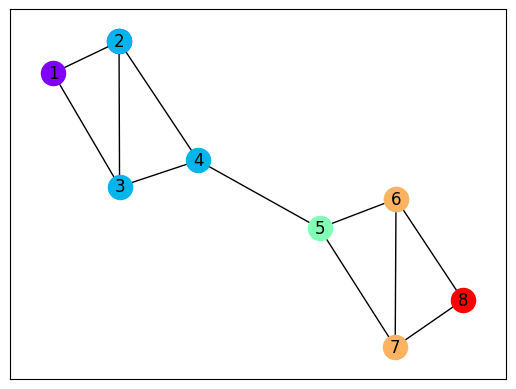

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

class CommunityDetection:
    def __init__(self, edges, ncc_threshold):
        self.graph = nx.Graph()
        self.graph.add_edges_from(edges)
        self.ncc_threshold = ncc_threshold

    def detect_communities(self):
        clusters = []
        possible_centers = list(self.graph.nodes)

        while possible_centers:
            center = possible_centers.pop(0)
            cluster = [center]
            possible_correlates = set(self.graph.nodes) - {center}

            while possible_correlates:
                added_to_cluster = False
                for node in list(possible_correlates):
                    if self.graph.has_edge(center, node) and self.graph[center][node]['weight'] >= self.ncc_threshold:
                        cluster.append(node)
                        possible_correlates.remove(node)
                        added_to_cluster = True

                if not added_to_cluster:
                    break

            clusters.append(cluster)
            possible_centers = [node for node in possible_centers if node not in cluster]

        return clusters

    def visualize(self, clusters):
        pos = nx.spring_layout(self.graph)
        colors = plt.cm.rainbow(np.linspace(0, 1, len(clusters)))

        for color, cluster in zip(colors, clusters):
            nx.draw_networkx_nodes(self.graph, pos, nodelist=cluster, node_color=[color])

        nx.draw_networkx_edges(self.graph, pos)
        nx.draw_networkx_labels(self.graph, pos)
        plt.show()

# Exemple d'utilisation
edges = [
    (1, 2, {'weight': 0.8}), (1, 3, {'weight': 0.6}),
    (2, 3, {'weight': 0.9}), (2, 4, {'weight': 0.7}),
    (3, 4, {'weight': 0.85}), (4, 5, {'weight': 0.6}),
    (5, 6, {'weight': 0.95}), (5, 7, {'weight': 0.75}),
    (6, 7, {'weight': 0.8}), (6, 8, {'weight': 0.65}),
    (7, 8, {'weight': 0.7})
]

ncc_threshold = 0.8
community_detector = CommunityDetection(edges, ncc_threshold)
clusters = community_detector.detect_communities()
print("Clusters:", clusters)
community_detector.visualize(clusters)